### HOG： Histogram of Orientation

原理&代码参考：
  
  (1) https://zhuanlan.zhihu.com/p/627783852
  
  (2) https://blog.csdn.net/qq_40913465/article/details/106070151


(288, 288)
(288, 288, 3)


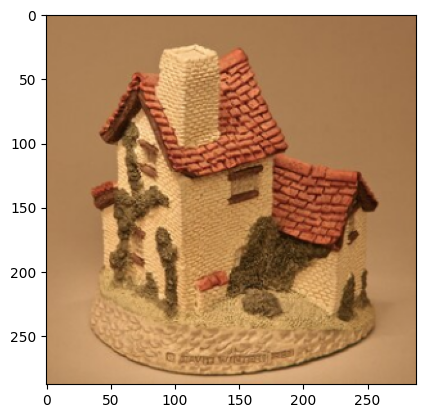

In [31]:
import cv2
import matplotlib.pyplot as plt

# 读取图片
img_path = "/content/drive/MyDrive/CodeSpace/CUHK/CMSC_CV/FeatureExtract&Tracking/example_3.png"
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_color = cv2.imread(img_path, cv2.IMREAD_COLOR)
h, w = img_gray.shape[:2]
# resize gray
img_gray = cv2.resize(img_gray, (int(h//16) * 16, int(w/16) * 16))
print(img_gray.shape)
plt.imshow(img_gray, cmap="gray")
# resize color
img_color = cv2.resize(img_color, (int(h//16) * 16, int(w/16) * 16))
print(img_color.shape)
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))

In [54]:
"""
  直接使用scikit的API：
"""

#importing required libraries
from skimage.feature import hog
from skimage import exposure

#creating hog features
fd, hog_image = hog(img_color, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, channel_axis=2)
print(fd.shape)
print(hog_image.shape)

(44100,)
(288, 288)


In [57]:
# 默认的block滑动stride为（1*h_cel，1*w_cell）
(288/8 - 1) ** 2 * 36

44100.0

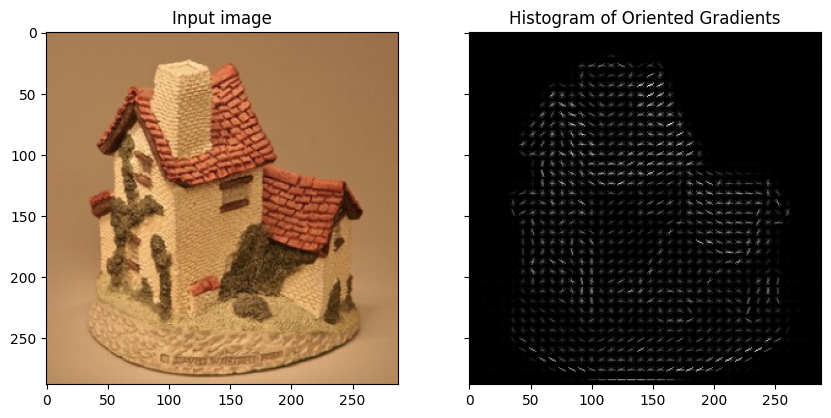

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

ax1.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = cv2.resize(hog_image, (img_color.shape[:2]))

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [58]:
"""
  直接使用open_cv的API：
"""
import cv2

#设置参数
winSize = (288, 288)
blockSize = (16,16)
blockStride = (8, 8)
cellSize = (8,8)
nbins =9
padding = (0,0)

hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)
hogdescriptor = hog.compute(img_color, padding)
print(hogdescriptor.shape)

(44100,)


### SIFT: Scale Invariant Feature Transformers

原理和算法流程参考：https://zhuanlan.zhihu.com/p/543263315

(813,)
(813,)
(813, 128)
key-point-0=(169.1017303466797, (40.04000473022461, 149.33311462402344), 2.3307275772094727, 0.02719847299158573)
descripter-0=[  2.   2.  18.   8.   0.   0.  36.  55.  75.  50.   3.   2.   0.   0.
  26.  41. 162. 114.   0.   0.   0.   0.   0.   4.  47.  11.   0.   0.
   0.   0.   1.   2.   0.   0.  14.  27.   2.   6.  26.  26.  68.  29.
  32.  54.   0.   0.   5.  13. 162.  40.   5.   1.   0.   0.   0.  15.
  84.   1.   0.   0.   0.   0.   1.   9.   0.   0.  39.  50.   3.   3.
  31.  13.  66.   5.  16.  36.   1.   1.  44. 108. 162.  19.   1.   0.
   0.   0.   4.  73.  87.   8.   0.   0.   0.   0.   0.   3.   0.   0.
   1.   1.   0.   1. 126.  52.   8.   0.   0.   0.   0.   0. 104. 138.
 143.   2.   0.   0.   0.   0.  12. 146.  54.   3.   0.   0.   0.   0.
   0.  16.]
length of key-points = 813


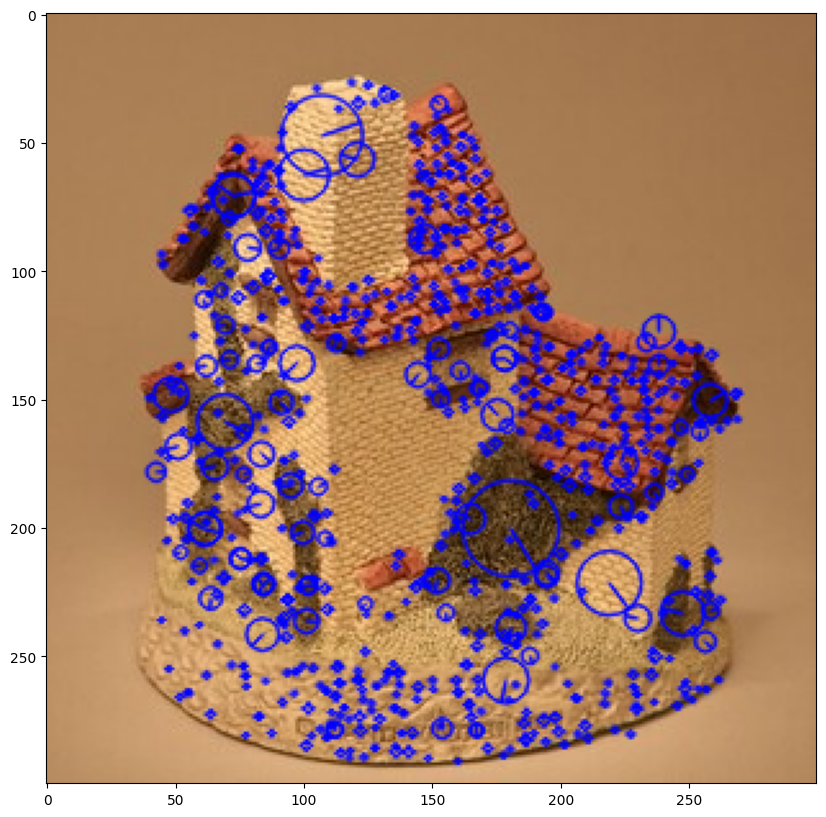

In [72]:
"""
  直接使用cv2的API：
"""
import cv2
import numpy as np
import matplotlib.pyplot as plt


# 第一步：读取图像，咋换成灰度图
img_path = "/content/drive/MyDrive/CodeSpace/CUHK/CMSC_CV/FeatureExtract&Tracking/example_3.png"
gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
color = cv2.imread(img_path, cv2.IMREAD_COLOR)

# 使用cv2.xfeatures2d.SIFT_create() 实例化sift函数
sift = cv2.xfeatures2d.SIFT_create()

# 得到所有的关键点
keypoints = sift.detect(gray, None)  # 计算关键点
print(np.array(keypoints).shape)
keypoints, descriptor = sift.compute(gray, keypoints)  # 根据关键点计算周围区域的特征向量描述
print(np.array(keypoints).shape)
print(descriptor.shape)

# 或者一次性计算出关键点和特征向量，如下：
keypoints, descriptor = sift.detectAndCompute(gray, None)
print(f"key-point-0={keypoints[0].angle, keypoints[0].pt, keypoints[0].size, keypoints[0].response}")
print(f"descripter-0={descriptor[0]}")

# 打印特征点的信息，其中最关键的 kpoint.pt 就是包含了位置信息
print(f"length of key-points = {len(keypoints)}")
# for index, kpoint in enumerate(keypoints):
#     print("关键点的位置是: pt[0]:{}\tpt[1]:{}".format(kpoint.pt[0], kpoint.pt[1]))

# 将关键点标记的图片上
color = cv2.drawKeypoints(image=color, outImage=color, keypoints=keypoints,
                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
                         color=(255, 0, 0))
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(color, cv2.COLOR_BGR2RGB))

found 604 maches


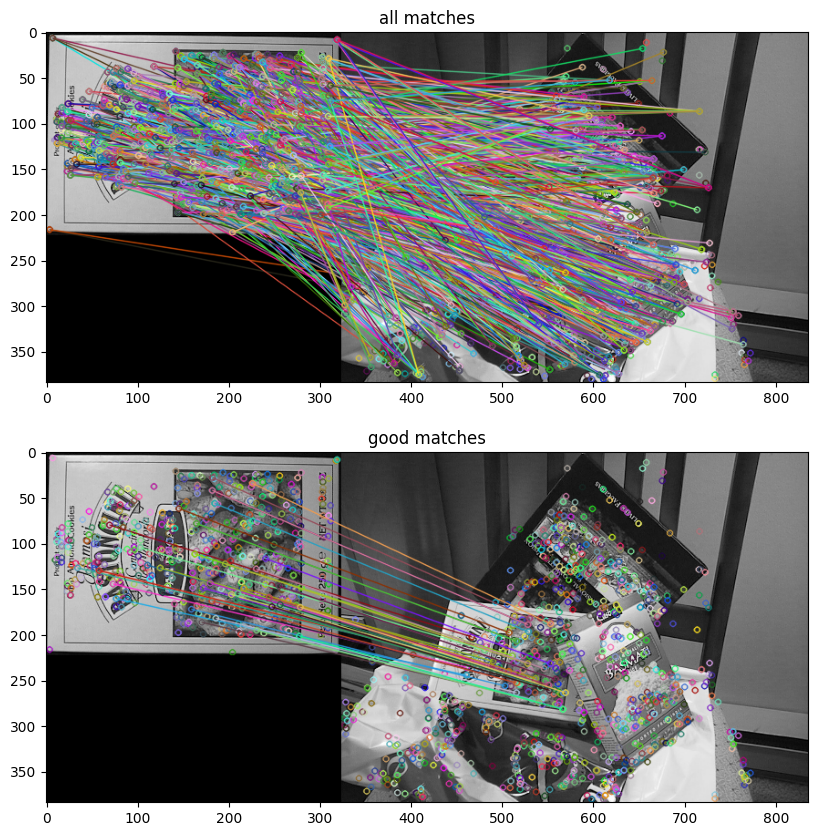

In [81]:
"""
  使用cv2进行两张图片的特征匹配
    特征提取使用SIFT，特征匹配使用暴力匹配算法KMatch
"""

import cv2

path_img1 = "/content/drive/MyDrive/CodeSpace/CUHK/CMSC_CV/FeatureExtract&Tracking/box.png"
path_img2 = "/content/drive/MyDrive/CodeSpace/CUHK/CMSC_CV/FeatureExtract&Tracking/box_in_scene.png"

img1 = cv2.imread(path_img1)
img2 = cv2.imread(path_img2)
# sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
# 采用暴力匹配
matcher = cv2.BFMatcher()
matches = matcher.knnMatch(des1, des2, k=2)  # k=2,表示寻找两个最近邻
print(f"found {len(matches)} maches")

# 上面每个点寻找两个最近邻匹配点，即对于kp1中的每个关键点，在kp2中寻找两个和它距离最近的特征点，所以每个关键点产生两组匹配，即两个KMatch类
# kp1相当于索引关键点，对应queryIdx； kp2相当于查询关键点，对应trainIdx
# for m in matches:  # 若寻找三个最近邻点，则m包括三个KMacth
#     print(m[0].queryIdx, m[0].queryIdx, m[0].distance)  # m[0]表示距离最近的那个匹配
#     print(m[1].queryIdx, m[1].queryIdx, m[1].distance)  # m[1]表示距离第二近的那个匹配

h1, w1 = img1.shape[:2]
h2, w2 = img2.shape[:2]

out_img1 = np.zeros((max(h1, h2), w1 + w2, 3), np.uint8)
out_img1[:h1, :w1] = img1
out_img1[:h2, w1:w1 + w2] = img2
out_img1 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, out_img1)

good_match = []
for m, n in matches:
    if m.distance < 0.5*n.distance:    # 如果第一个邻近距离比第二个邻近距离的0.5倍小，则保留
        good_match.append(m)

out_img2 = np.zeros((max(h1, h2), w1 + w2, 3), np.uint8)
out_img2[:h1, :w1] = img1
out_img2[:h2, w1:w1 + w2] = img2
# p1 = [kp1[kpp.queryIdx] for kpp in good_match]  # kp1中挑选处的关键点
# p2 = [kp2[kpp.trainIdx] for kpp in good_match]  # kp2中挑选处的关键点
out_img2 = cv2.drawMatches(img1, kp1, img2, kp2, good_match, out_img2)
# drawMatchesKnn_cv2(img1, kp1, img2, kp2, good_match)

plt.figure(figsize=(20,10))
plt.subplot(2,1,1), plt.title("all matches")
plt.imshow(cv2.cvtColor(out_img1, cv2.COLOR_BGR2RGB))
plt.subplot(2,1,2), plt.title("good matches")
plt.imshow(cv2.cvtColor(out_img2, cv2.COLOR_BGR2RGB))
